In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load The train and test dataset
train_df = pd.read_csv("dataset/train_data.csv")
test_df = pd.read_csv("dataset/test_data.csv")

In [3]:
# Data Exploration

In [4]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [6]:
# Find the shape of the dataset
print("shape of the train_df :" , train_df.shape)
print("shape of the test_df :" , test_df.shape)

shape of the train_df : (54808, 14)
shape of the test_df : (23490, 13)


In [7]:
# Gathering the information of the train dataset and test data set

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [10]:
# Finding any null values present in the data set

In [11]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [13]:
# Handling Missing values

In [14]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
train_df.education = impute.fit_transform(train_df['education'].values.reshape(-1,1))[:,0]
train_df.previous_year_rating = impute.fit_transform(train_df['previous_year_rating'].values.reshape(-1,1))[:,0]
test_df.education = impute.fit_transform(test_df['education'].values.reshape(-1,1))[:,0]
test_df.previous_year_rating = impute.fit_transform(test_df['previous_year_rating'].values.reshape(-1,1))[:,0]

In [15]:
train_df.isnull().sum().sum()

0

In [16]:
test_df.isnull().sum().sum()

0

In [17]:
# Data Visualization

In [18]:
train_df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [19]:
def bar_chart(col_name):
    promoted = train_df[train_df["is_promoted"]==1][col_name].value_counts()
    not_promoted = train_df[train_df["is_promoted"]==0][col_name].value_counts()
    promoted_df = pd.DataFrame([promoted,not_promoted],index=["promoted","not_promoted"])
    promoted_df.plot(kind="bar")

In [20]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

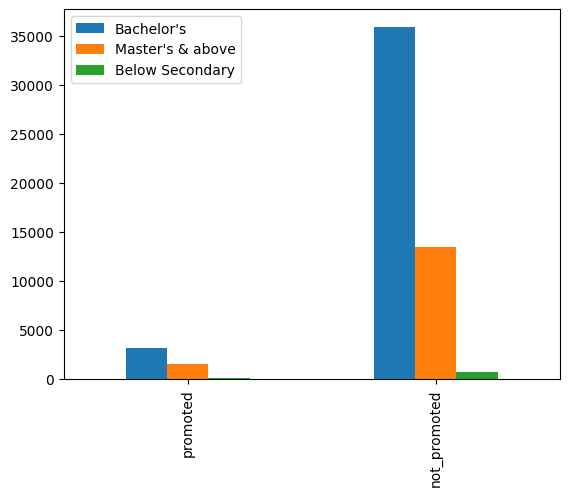

In [21]:
bar_chart('education')

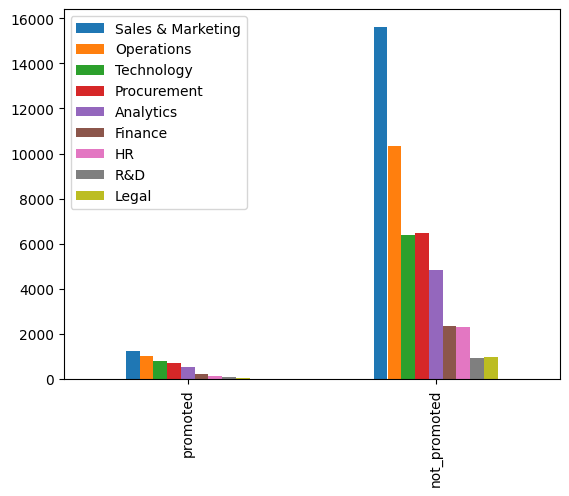

In [22]:
bar_chart('department')

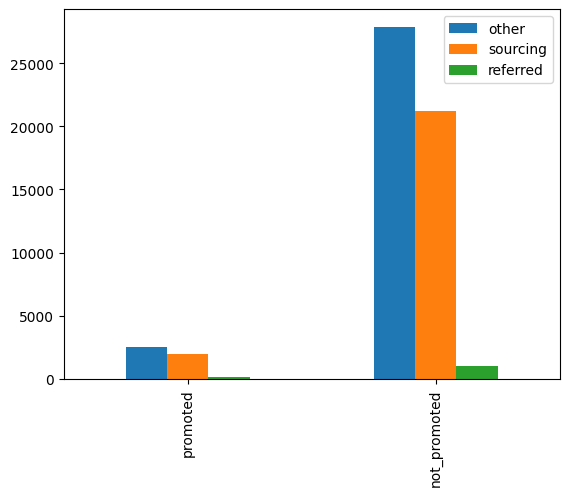

In [23]:
bar_chart('recruitment_channel')

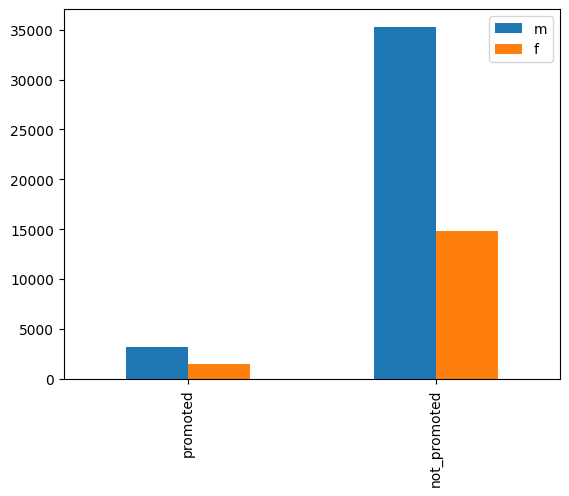

In [24]:
bar_chart('gender')

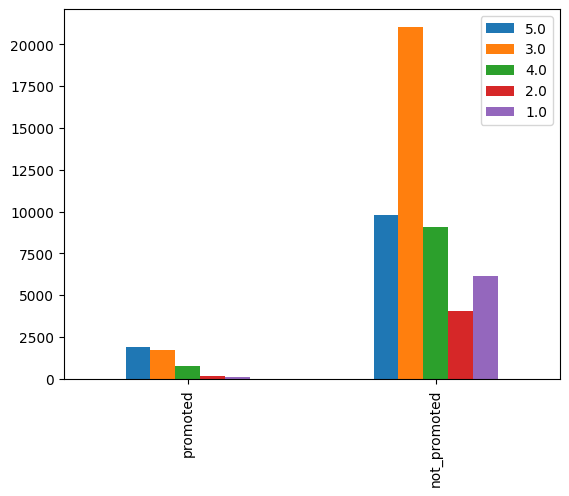

In [25]:
bar_chart('previous_year_rating')

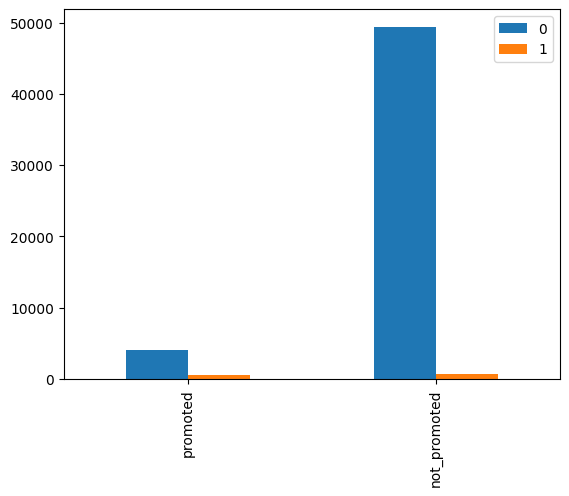

In [26]:
bar_chart('awards_won?')

In [27]:
# Label encoding the train_df dataset

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
train_df.drop('employee_id',axis=1,inplace=True)

In [30]:
train_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [31]:
train_df.department = encoder.fit_transform(train_df.department)
train_df.region = encoder.fit_transform(train_df.region)
train_df.education = encoder.fit_transform(train_df.education)
train_df.gender = encoder.fit_transform(train_df.gender)
train_df.recruitment_channel = encoder.fit_transform(train_df.recruitment_channel)

In [32]:
# Label encoding the test_df dataset

In [33]:
test_df.department = encoder.fit_transform(test_df.department)
test_df.region = encoder.fit_transform(test_df.region)
test_df.education = encoder.fit_transform(test_df.education)
test_df.gender = encoder.fit_transform(test_df.gender)
test_df.recruitment_channel = encoder.fit_transform(test_df.recruitment_channel)

# Model Development with various Algorithms

In [34]:
# Split the dataset into train test split 

In [35]:
X= train_df.drop("is_promoted",axis=1)
y=train_df.is_promoted

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
# Import required Algorithms
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [38]:
models = [DecisionTreeClassifier(),
          ExtraTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          BaggingClassifier(),
          XGBClassifier(),
          CatBoostClassifier()]

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
for model in models:
    model.fit(X_train,y_train)
    y_p = model.predict(X_test)
    print(model)
    print("Accuracy_Score :",accuracy_score(y_test,y_p))
    print('\n')

DecisionTreeClassifier()
Accuracy_Score : 0.8945447910965152


ExtraTreeClassifier()
Accuracy_Score : 0.8865170589308521


RandomForestClassifier()
Accuracy_Score : 0.9383324210910418


AdaBoostClassifier()
Accuracy_Score : 0.9308520343003102


GradientBoostingClassifier()
Accuracy_Score : 0.943258529465426


BaggingClassifier()
Accuracy_Score : 0.9388797664659734


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
  

148:	learn: 0.1666909	total: 1.86s	remaining: 10.6s
149:	learn: 0.1666305	total: 1.88s	remaining: 10.6s
150:	learn: 0.1664684	total: 1.89s	remaining: 10.6s
151:	learn: 0.1663514	total: 1.9s	remaining: 10.6s
152:	learn: 0.1661742	total: 1.91s	remaining: 10.6s
153:	learn: 0.1660362	total: 1.92s	remaining: 10.6s
154:	learn: 0.1659741	total: 1.93s	remaining: 10.5s
155:	learn: 0.1659286	total: 1.95s	remaining: 10.5s
156:	learn: 0.1658696	total: 1.96s	remaining: 10.5s
157:	learn: 0.1657579	total: 1.97s	remaining: 10.5s
158:	learn: 0.1657126	total: 1.98s	remaining: 10.5s
159:	learn: 0.1656700	total: 1.99s	remaining: 10.4s
160:	learn: 0.1656087	total: 2s	remaining: 10.4s
161:	learn: 0.1655644	total: 2.01s	remaining: 10.4s
162:	learn: 0.1655264	total: 2.02s	remaining: 10.4s
163:	learn: 0.1654875	total: 2.03s	remaining: 10.4s
164:	learn: 0.1654600	total: 2.04s	remaining: 10.3s
165:	learn: 0.1654172	total: 2.06s	remaining: 10.3s
166:	learn: 0.1652409	total: 2.07s	remaining: 10.3s
167:	learn: 0.16

314:	learn: 0.1550260	total: 3.79s	remaining: 8.24s
315:	learn: 0.1549839	total: 3.8s	remaining: 8.23s
316:	learn: 0.1549410	total: 3.81s	remaining: 8.22s
317:	learn: 0.1549161	total: 3.82s	remaining: 8.2s
318:	learn: 0.1548610	total: 3.83s	remaining: 8.19s
319:	learn: 0.1548332	total: 3.85s	remaining: 8.17s
320:	learn: 0.1547755	total: 3.86s	remaining: 8.16s
321:	learn: 0.1547190	total: 3.87s	remaining: 8.15s
322:	learn: 0.1546823	total: 3.88s	remaining: 8.13s
323:	learn: 0.1546410	total: 3.89s	remaining: 8.12s
324:	learn: 0.1545953	total: 3.9s	remaining: 8.11s
325:	learn: 0.1545674	total: 3.91s	remaining: 8.09s
326:	learn: 0.1545368	total: 3.92s	remaining: 8.08s
327:	learn: 0.1545212	total: 3.94s	remaining: 8.06s
328:	learn: 0.1544804	total: 3.95s	remaining: 8.05s
329:	learn: 0.1543350	total: 3.96s	remaining: 8.04s
330:	learn: 0.1542971	total: 3.97s	remaining: 8.02s
331:	learn: 0.1542635	total: 3.98s	remaining: 8.01s
332:	learn: 0.1542311	total: 3.99s	remaining: 8s
333:	learn: 0.1542

482:	learn: 0.1482639	total: 5.7s	remaining: 6.1s
483:	learn: 0.1482516	total: 5.71s	remaining: 6.09s
484:	learn: 0.1481938	total: 5.72s	remaining: 6.08s
485:	learn: 0.1481432	total: 5.74s	remaining: 6.07s
486:	learn: 0.1481264	total: 5.75s	remaining: 6.05s
487:	learn: 0.1480878	total: 5.76s	remaining: 6.04s
488:	learn: 0.1480540	total: 5.77s	remaining: 6.03s
489:	learn: 0.1480281	total: 5.78s	remaining: 6.01s
490:	learn: 0.1479779	total: 5.79s	remaining: 6s
491:	learn: 0.1479439	total: 5.8s	remaining: 5.99s
492:	learn: 0.1478800	total: 5.81s	remaining: 5.98s
493:	learn: 0.1477930	total: 5.82s	remaining: 5.96s
494:	learn: 0.1477558	total: 5.83s	remaining: 5.95s
495:	learn: 0.1477319	total: 5.84s	remaining: 5.94s
496:	learn: 0.1476809	total: 5.86s	remaining: 5.93s
497:	learn: 0.1476532	total: 5.87s	remaining: 5.91s
498:	learn: 0.1476230	total: 5.88s	remaining: 5.9s
499:	learn: 0.1475797	total: 5.89s	remaining: 5.89s
500:	learn: 0.1475501	total: 5.9s	remaining: 5.88s
501:	learn: 0.147518

650:	learn: 0.1430335	total: 7.63s	remaining: 4.09s
651:	learn: 0.1430055	total: 7.64s	remaining: 4.08s
652:	learn: 0.1429903	total: 7.66s	remaining: 4.07s
653:	learn: 0.1429560	total: 7.67s	remaining: 4.06s
654:	learn: 0.1429419	total: 7.68s	remaining: 4.04s
655:	learn: 0.1429098	total: 7.69s	remaining: 4.03s
656:	learn: 0.1428680	total: 7.7s	remaining: 4.02s
657:	learn: 0.1428514	total: 7.71s	remaining: 4.01s
658:	learn: 0.1428281	total: 7.72s	remaining: 4s
659:	learn: 0.1428163	total: 7.73s	remaining: 3.98s
660:	learn: 0.1427847	total: 7.75s	remaining: 3.97s
661:	learn: 0.1427609	total: 7.76s	remaining: 3.96s
662:	learn: 0.1427275	total: 7.77s	remaining: 3.95s
663:	learn: 0.1426886	total: 7.78s	remaining: 3.94s
664:	learn: 0.1426596	total: 7.79s	remaining: 3.92s
665:	learn: 0.1426464	total: 7.8s	remaining: 3.91s
666:	learn: 0.1426110	total: 7.81s	remaining: 3.9s
667:	learn: 0.1425743	total: 7.82s	remaining: 3.89s
668:	learn: 0.1425428	total: 7.83s	remaining: 3.88s
669:	learn: 0.1425

823:	learn: 0.1383870	total: 9.59s	remaining: 2.05s
824:	learn: 0.1383853	total: 9.6s	remaining: 2.04s
825:	learn: 0.1383743	total: 9.62s	remaining: 2.02s
826:	learn: 0.1383516	total: 9.63s	remaining: 2.01s
827:	learn: 0.1382539	total: 9.64s	remaining: 2s
828:	learn: 0.1382361	total: 9.65s	remaining: 1.99s
829:	learn: 0.1382035	total: 9.66s	remaining: 1.98s
830:	learn: 0.1381862	total: 9.67s	remaining: 1.97s
831:	learn: 0.1381580	total: 9.68s	remaining: 1.96s
832:	learn: 0.1381181	total: 9.7s	remaining: 1.94s
833:	learn: 0.1380996	total: 9.71s	remaining: 1.93s
834:	learn: 0.1380640	total: 9.72s	remaining: 1.92s
835:	learn: 0.1380274	total: 9.73s	remaining: 1.91s
836:	learn: 0.1380009	total: 9.74s	remaining: 1.9s
837:	learn: 0.1379806	total: 9.75s	remaining: 1.89s
838:	learn: 0.1379690	total: 9.76s	remaining: 1.87s
839:	learn: 0.1379414	total: 9.77s	remaining: 1.86s
840:	learn: 0.1379158	total: 9.78s	remaining: 1.85s
841:	learn: 0.1378783	total: 9.79s	remaining: 1.84s
842:	learn: 0.1378

993:	learn: 0.1342154	total: 11.5s	remaining: 69.5ms
994:	learn: 0.1341870	total: 11.5s	remaining: 58ms
995:	learn: 0.1341592	total: 11.5s	remaining: 46.4ms
996:	learn: 0.1341295	total: 11.6s	remaining: 34.8ms
997:	learn: 0.1341216	total: 11.6s	remaining: 23.2ms
998:	learn: 0.1341108	total: 11.6s	remaining: 11.6ms
999:	learn: 0.1340741	total: 11.6s	remaining: 0us
Accuracy_Score : 0.9449005655902207




In [41]:
# From the above model testing we found that XGBClassifier() shows the higher accuracy score

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
print("Accuracy_Score :",accuracy_score(y_test,y_pred))
print("classification_report :",'\n',classification_report(y_test,y_pred))
print("confusion_matrix :",'\n',confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.9449005655902207
classification_report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5050
           1       0.89      0.34      0.49       431

    accuracy                           0.94      5481
   macro avg       0.92      0.67      0.73      5481
weighted avg       0.94      0.94      0.93      5481

confusion_matrix : 
 [[5031   19]
 [ 283  148]]


In [45]:
y_pred_test = model.predict(test_df)

In [46]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
Final_Report = pd.DataFrame({'employee_id':test_df['employee_id'],'is_promoted':y_pred_test})

In [55]:
Final_Report

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [58]:
file = "Final_Report.csv"
pd.DataFrame(Final_Report).to_csv(file,index=False)

In [57]:
Final_Report

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
